<a href="https://colab.research.google.com/github/Teemo37/NL_LAB_2/blob/main/LR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=b751df2338ec1c5387f571e2ef199e3d1c3421cf96e8be03d35f5b7ae8a87feb
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
articles=['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Belarus', 'Moldova', 'Russia', 'Ukraine', 'Estonia', 'Latvia', 'Lithuania', 'Armenia', 'Azerbaijan', 'Georgia_(country)',
          'The_Colour_of_Magic', 'The_Light_Fantastic', 'Equal_Rites', 'Mort', 'Sourcery', 'Wyrd_Sisters', 'Pyramids_(novel)', 'Guards!_Guards!', 'Eric_(novel)', 'Moving_Pictures_(novel)', 'Reaper_Man', 'Witches_Abroad', 'Small_Gods', 'Lords_and_Ladies_(novel)', 'Men_at_Arms',
          'Empiricism', 'Rationalism', 'Philosophical_skepticism', 'Pyrrhonism', 'Pragmatism', 'Naturalized_epistemology', 'Relativism', 'Constructivism_(philosophy_of_science)', 'Social_constructivism', 'Bayesian_epistemology', 'Feminist_epistemology', 'Decolonization_of_knowledge', 'Naïve_realism', 'Disjunctivism', 'Scottish_common_sense_realism', 'Fideism', 'Fictionalism']
wiki_list=[]
title=[]
for article in articles:
    print("loading content: ", article)
    wiki_list.append(wikipedia.page(article, auto_suggest=False, redirect=True, preload=False).content)
    title.append(article)

loading content:  Kazakhstan
loading content:  Kyrgyzstan
loading content:  Tajikistan
loading content:  Turkmenistan
loading content:  Uzbekistan
loading content:  Belarus
loading content:  Moldova
loading content:  Russia
loading content:  Ukraine
loading content:  Estonia
loading content:  Latvia
loading content:  Lithuania
loading content:  Armenia
loading content:  Azerbaijan
loading content:  Georgia_(country)
loading content:  The_Colour_of_Magic
loading content:  The_Light_Fantastic
loading content:  Equal_Rites
loading content:  Mort
loading content:  Sourcery
loading content:  Wyrd_Sisters
loading content:  Pyramids_(novel)
loading content:  Guards!_Guards!
loading content:  Eric_(novel)
loading content:  Moving_Pictures_(novel)
loading content:  Reaper_Man
loading content:  Witches_Abroad
loading content:  Small_Gods
loading content:  Lords_and_Ladies_(novel)
loading content:  Men_at_Arms
loading content:  Empiricism
loading content:  Rationalism
loading content:  Philosophi

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
nlp = spacy.load("en_core_web_sm")
stemmer = SnowballStemmer("english")

def preprocess(text):
    doc = nlp(text.lower())
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]
    return " ".join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor = preprocess)
X = vectorizer.fit_transform(wiki_list)

print(vectorizer.get_feature_names_out())
print(X.shape)

['00' '000' '0001' ... '莊子' '齊物篇' '𐎠𐎼𐎷𐎡𐎴']
(47, 15233)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


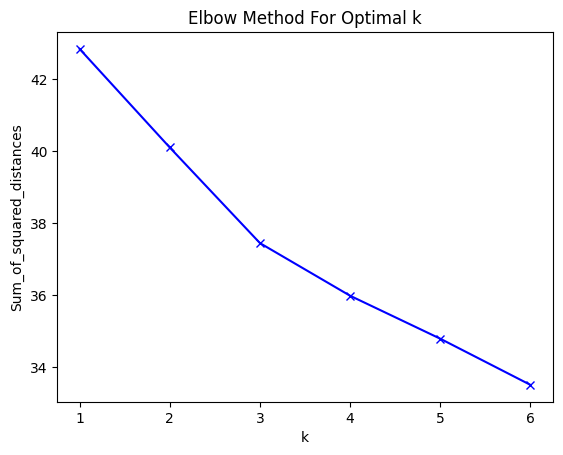

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import pandas as pd
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl)

                                     title  cluster
0                               Kazakhstan        0
1                               Kyrgyzstan        0
2                               Tajikistan        0
3                             Turkmenistan        0
4                               Uzbekistan        0
5                                  Belarus        0
6                                  Moldova        0
7                                   Russia        0
8                                  Ukraine        0
9                                  Estonia        0
10                                  Latvia        0
11                               Lithuania        0
12                                 Armenia        0
13                              Azerbaijan        0
14                       Georgia_(country)        0
15                     The_Colour_of_Magic        1
16                     The_Light_Fantastic        1
17                             Equal_Rites        1
18          

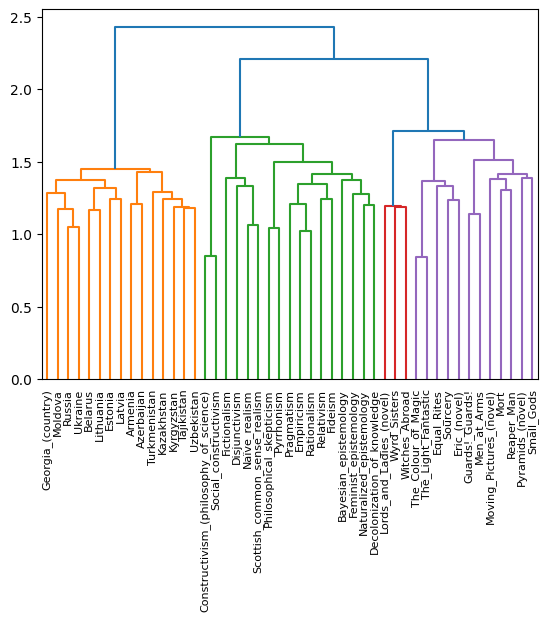

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(X.toarray(), method='ward')
dendrogram(mergings,
           labels=title,
           leaf_rotation=90,
           leaf_font_size=8,
           )

plt.show()

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

db = DBSCAN(eps=1.347, min_samples=6).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('clusters:', n_clusters_)
print('noise:', n_noise_)

clusters = pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(clusters)

clusters: 3
noise: 1
                                     title  cluster
0                               Kazakhstan        0
1                               Kyrgyzstan        0
2                               Tajikistan        0
3                             Turkmenistan        0
4                               Uzbekistan        0
5                                  Belarus        0
6                                  Moldova        0
7                                   Russia        0
8                                  Ukraine        0
9                                  Estonia        0
10                                  Latvia        0
11                               Lithuania        0
12                                 Armenia        0
13                              Azerbaijan        0
14                       Georgia_(country)        0
15                     The_Colour_of_Magic        1
16                     The_Light_Fantastic        1
17                             Equal_Rites 